In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import keras

Using plaidml.keras.backend backend.


### Generating dataset of cropped images of player using custom yolov8 model

In [3]:
def getMidPoint(t):
    x = int(((t[0]+t[2])/2))
    y = int(((t[1]+t[3])/2))
    return x,y

In [4]:
import mediapipe as mp 

In [5]:
from ultralytics import YOLO

In [5]:
model = YOLO('/Users/apple/Downloads/player_bbox4.pt')

In [9]:
main_dir = '/Users/apple/Downloads/VideoBadminton_Dataset/'

for d in os.listdir(main_dir):
    if d=='.DS_Store':
        continue
    listd = os.listdir(os.path.join(main_dir,d))
    print(d,len(listd))

# listd = os.listdir(main_dir)
# print(len(listd))

01_Cross Court Flight 167
03_Tap Smash 109
09_Rush Shot 113
14_Smash 822
12_Clear 945
15_Flat Shot 327
13_Long Serve 991
04_Block 316
00_Short Serve 881
17_Short Flat Shot 131
16_Rear Court Flat Drive 121
08_Cut 585
05_Drop Shot 812
11_Defensive Drive 111
02_Lift 758
07_Transitional Slice 123
06_Push Shot 401
10_Defensive Clear 109


In [ ]:
#New data

In [6]:
main_dir = '/Users/apple/Desktop/newData/'

for d in os.listdir(main_dir):
    if d=='.DS_Store' or d.split('.')[-1]=='npy' or d.split('.')[-1]=='keras' :
        continue
    listd = os.listdir(os.path.join(main_dir,d))
    print(d,len(listd))

# listd = os.listdir(main_dir)
# print(len(listd))

Drop 61
Smash 91
Backhand 40
Serve 75
Block 78


### Go through every folder and generate the dataset for player(considering 10 frames)

In [63]:
main_dir = '/Users/apple/Desktop/newData/Smash/'

i=0

# plt.figure(1)

FastFrames = []

PredA = []
PredP = []
listd = os.listdir(main_dir)

for clip in listd:
          
    fastFrames = []
    flag=0

    vid = cv2.VideoCapture(os.path.join(main_dir,clip))
    length = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))

            #if frames in vid <32 skip
    if length <10:
        continue
        
    fst = int(length/10)
    f = 0

    while True:
        success, frame = vid.read()

        if not success:
            break

        f+=1

        if f%fst==0 and len(fastFrames)<10:
            result = model(frame,conf=0.60)
            if result[0].boxes.xyxy.shape[0] != 2:
                flag=1
                break

            box = getMidPoint(result[0].boxes.xyxy[0])
            z=[]


            z.append(frame[box[1]-125:box[1]+125,box[0]-125:box[0]+125])
            
            z = np.asarray(z)
            
            if z.shape != (1,250,250,3):
                flag=1
                break
                
            fastFrames.append(z)

            del z

    if flag==1:
        continue
        
    fastFrames = np.asarray(fastFrames)
    
    FastFrames.append(fastFrames)
    
    PredA.append(main_dir.split('/')[-2])
#     PredA.append(clip.split('.')[0].split('_')[-1])
    

#     PredP.append(clip.split('.')[0].split('_')[-2])

    del fastFrames




    i+=1
    



0: 384x640 1 Player1, 1 Player2, 127.3ms
Speed: 5.0ms preprocess, 127.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 117.7ms
Speed: 3.1ms preprocess, 117.7ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 105.8ms
Speed: 2.4ms preprocess, 105.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 105.8ms
Speed: 2.1ms preprocess, 105.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 107.4ms
Speed: 3.5ms preprocess, 107.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 111.3ms
Speed: 3.3ms preprocess, 111.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 103.5ms
Speed: 2.3ms preprocess, 103.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player

Speed: 4.0ms preprocess, 87.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.7ms
Speed: 2.0ms preprocess, 84.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 94.1ms
Speed: 2.1ms preprocess, 94.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 86.6ms
Speed: 2.1ms preprocess, 86.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.3ms
Speed: 2.0ms preprocess, 84.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 89.5ms
Speed: 2.1ms preprocess, 89.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.3ms
Speed: 2.0ms preprocess, 84.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.0ms
Speed: 2.0ms preprocess, 83.0ms in


0: 384x640 1 Player1, 1 Player2, 82.4ms
Speed: 2.1ms preprocess, 82.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.9ms
Speed: 2.0ms preprocess, 83.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.0ms
Speed: 1.9ms preprocess, 82.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.3ms
Speed: 2.1ms preprocess, 82.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 82.7ms
Speed: 1.8ms preprocess, 82.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 87.8ms
Speed: 4.1ms preprocess, 87.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 92.8ms
Speed: 2.2ms preprocess, 92.8ms inference, 1.2ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 85.7ms
Spee


0: 384x640 1 Player1, 1 Player2, 85.3ms
Speed: 1.9ms preprocess, 85.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.7ms
Speed: 1.8ms preprocess, 83.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 92.0ms
Speed: 2.1ms preprocess, 92.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.9ms
Speed: 4.2ms preprocess, 84.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 95.1ms
Speed: 2.1ms preprocess, 95.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 93.3ms
Speed: 2.8ms preprocess, 93.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.3ms
Speed: 2.1ms preprocess, 84.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 384x640 1 Player1, 1 Player2, 85.9ms
Speed: 2.9ms preprocess, 85.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 97.1ms
Speed: 2.0ms preprocess, 97.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 85.5ms
Speed: 2.2ms preprocess, 85.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.2ms
Speed: 1.9ms preprocess, 83.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.5ms
Speed: 2.0ms preprocess, 83.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.4ms
Speed: 1.8ms preprocess, 84.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 85.0ms
Speed: 1.8ms preprocess, 85.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 384x640 1 Player1, 1 Player2, 81.6ms
Speed: 2.8ms preprocess, 81.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.1ms
Speed: 2.1ms preprocess, 82.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.8ms
Speed: 2.1ms preprocess, 83.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.6ms
Speed: 2.0ms preprocess, 83.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.0ms
Speed: 1.9ms preprocess, 84.0ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.6ms
Speed: 1.8ms preprocess, 83.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.2ms
Speed: 1.7ms preprocess, 83.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 384x640 1 Player1, 1 Player2, 85.8ms
Speed: 3.0ms preprocess, 85.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 91.5ms
Speed: 2.2ms preprocess, 91.5ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 85.8ms
Speed: 2.1ms preprocess, 85.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.0ms
Speed: 1.9ms preprocess, 82.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.5ms
Speed: 2.0ms preprocess, 83.5ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.7ms
Speed: 1.8ms preprocess, 83.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.3ms
Speed: 2.0ms preprocess, 83.3ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 384x640 1 Player1, 1 Player2, 83.3ms
Speed: 1.8ms preprocess, 83.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.9ms
Speed: 1.8ms preprocess, 83.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 86.0ms
Speed: 3.8ms preprocess, 86.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 81.5ms
Speed: 2.0ms preprocess, 81.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 81.2ms
Speed: 2.8ms preprocess, 81.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.8ms
Speed: 2.1ms preprocess, 82.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.4ms
Speed: 2.0ms preprocess, 83.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 448x640 1 Player1, 1 Player2, 91.1ms
Speed: 2.8ms preprocess, 91.1ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 448x640 1 Player1, 1 Player2, 90.8ms
Speed: 3.0ms preprocess, 90.8ms inference, 0.8ms postprocess per image at shape (1, 3, 448, 640)

0: 384x640 1 Player1, 1 Player2, 86.8ms
Speed: 4.9ms preprocess, 86.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.2ms
Speed: 2.9ms preprocess, 84.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 85.2ms
Speed: 2.1ms preprocess, 85.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.7ms
Speed: 2.3ms preprocess, 83.7ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.0ms
Speed: 2.3ms preprocess, 84.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 384x640 1 Player1, 1 Player2, 86.0ms
Speed: 3.4ms preprocess, 86.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.2ms
Speed: 2.3ms preprocess, 84.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 92.9ms
Speed: 2.1ms preprocess, 92.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 87.2ms
Speed: 2.0ms preprocess, 87.2ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 81.9ms
Speed: 2.0ms preprocess, 81.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.2ms
Speed: 2.1ms preprocess, 82.2ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.1ms
Speed: 1.8ms preprocess, 83.1ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 

Speed: 2.3ms preprocess, 85.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.0ms
Speed: 2.9ms preprocess, 82.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 85.0ms
Speed: 2.0ms preprocess, 85.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.0ms
Speed: 2.0ms preprocess, 84.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.2ms
Speed: 1.9ms preprocess, 84.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.2ms
Speed: 1.8ms preprocess, 83.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 92.9ms
Speed: 1.9ms preprocess, 92.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 88.1ms
Speed: 2.3ms preprocess, 88.1ms in


0: 384x640 1 Player1, 1 Player2, 88.6ms
Speed: 2.6ms preprocess, 88.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.3ms
Speed: 2.1ms preprocess, 84.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.7ms
Speed: 2.3ms preprocess, 83.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.6ms
Speed: 2.2ms preprocess, 83.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.3ms
Speed: 2.2ms preprocess, 84.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.1ms
Speed: 2.3ms preprocess, 83.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 85.4ms
Speed: 5.0ms preprocess, 85.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 384x640 1 Player1, 1 Player2, 84.6ms
Speed: 2.0ms preprocess, 84.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.1ms
Speed: 2.1ms preprocess, 84.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.6ms
Speed: 2.1ms preprocess, 84.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 87.5ms
Speed: 2.0ms preprocess, 87.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 93.9ms
Speed: 2.2ms preprocess, 93.9ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 87.3ms
Speed: 2.1ms preprocess, 87.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 87.5ms
Speed: 3.7ms preprocess, 87.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 384x640 1 Player1, 1 Player2, 89.2ms
Speed: 2.0ms preprocess, 89.2ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 86.6ms
Speed: 2.0ms preprocess, 86.6ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 81.6ms
Speed: 2.1ms preprocess, 81.6ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 80.6ms
Speed: 2.0ms preprocess, 80.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.3ms
Speed: 1.8ms preprocess, 82.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 81.3ms
Speed: 1.7ms preprocess, 81.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 82.9ms
Speed: 4.4ms preprocess, 82.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 


0: 384x640 1 Player1, 1 Player2, 83.5ms
Speed: 2.1ms preprocess, 83.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 84.3ms
Speed: 2.0ms preprocess, 84.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 92.9ms
Speed: 1.8ms preprocess, 92.9ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 85.6ms
Speed: 2.1ms preprocess, 85.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 86.4ms
Speed: 4.0ms preprocess, 86.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.5ms
Speed: 2.0ms preprocess, 83.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 83.3ms
Speed: 2.8ms preprocess, 83.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 

In [64]:
FastFrames = np.asarray(FastFrames)
FastFrames = FastFrames.reshape((FastFrames.shape[0],10,250,250,3))
PredA = np.asarray(PredA)
PredP = np.asarray(PredP)
print(FastFrames.shape,PredA.shape,PredP.shape)

(81, 10, 250, 250, 3) (81,) (0,)


### Checking frames for any wrong samples

In [65]:
i=0

Smash 80


IndexError: index 81 is out of bounds for axis 0 with size 81

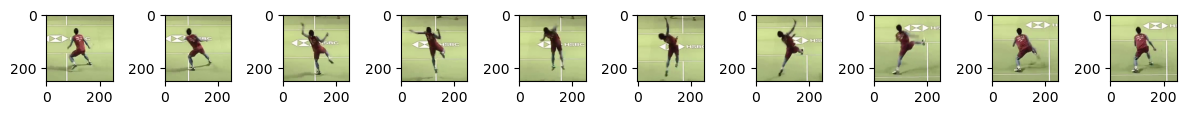

In [82]:
print(PredA[i],i)
plt.figure(figsize=(15,5))
for k in range(1,11):
    plt.subplot(5,10,k)
    plt.imshow(FastFrames[i,k-1])
    
print(PredA[i+1],i+1)
for k in range(1,11):
    plt.subplot(5,10,k+10)
    plt.imshow(FastFrames[i+1,k-1])

print(PredA[i+2],i+2)
for k in range(1,11):
    plt.subplot(5,10,k+20)
    plt.imshow(FastFrames[i+2,k-1])
    
print(PredA[i+3],i+3)
for k in range(1,11):
    plt.subplot(5,10,k+30)
    plt.imshow(FastFrames[i+3,k-1])
    
print(PredA[i+4],i+4)
for k in range(1,11):
    plt.subplot(5,10,k+40)
    plt.imshow(FastFrames[i+4,k-1])
i+=5

In [83]:
# valid = [ 1,2,6,7,8,12,13,14,16,17,18,20,22,26,27,30,33,34,35,36,38,41,42,43,
#          46,47,48,49,50,51,52,54,55,56,58,59,60,62,64,65,66,67,68,75,76,77,80]

In [84]:
X=[]
y=[]
for i in valid:
    X.append(FastFrames[i])
    y.append(PredA[i])
X = np.asarray(X)
y = np.asarray(y)
print(X.shape,y.shape)

(47, 10, 250, 250, 3) (47,)


### Saving the dataset

In [85]:
np.save('/Users/apple/Desktop/newData/X-smash2.npy',X)
np.save('/Users/apple/Desktop/newData/y-smash2.npy',y)

### Loading the heatmap dataset(generated using limbHeatmap.ipynb)

In [ ]:
X1 = np.load('/Users/apple/Desktop/BadDatat/XH-14.npy')
y1 = np.load('/Users/apple/Desktop/BadDatat/y-14.npy')[:185]
print(X1.shape,y1.shape)
X2 = np.load('/Users/apple/Desktop/BadDatat/XH-00.npy')
y2 = np.load('/Users/apple/Desktop/BadDatat/y-00.npy')[:141]
print(X2.shape,y2.shape)
X3 = np.load('/Users/apple/Desktop/BadDatat/XH-04.npy')
y3 = np.load('/Users/apple/Desktop/BadDatat/y-04.npy')[:75]
print(X3.shape,y3.shape)

X = np.concatenate((X1,X2,X3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
print(X.shape,y.shape)

### Using 2 different datasets

In [18]:
X1 = np.load('/Users/apple/Desktop/newData/HX-serve.npy')
y1 = np.load('/Users/apple/Desktop/newData/y-serve.npy')
print(X1.shape,y1.shape)
X2 = np.load('/Users/apple/Desktop/newData/HX-block.npy')
y2 = np.load('/Users/apple/Desktop/newData/y-block.npy')[0:40]
print(X2.shape,y2.shape)
X3 = np.load('/Users/apple/Desktop/newData/HX-smash.npy')
y3 = np.load('/Users/apple/Desktop/newData/y-smash2.npy')
print(X3.shape,y3.shape)

X = np.concatenate((X1,X2,X3),axis=0)
y = np.concatenate((y1,y2,y3),axis=0)
print(X.shape,y.shape)

(66, 10, 250, 250) (66,)
(40, 10, 250, 250) (40,)
(47, 10, 250, 250) (47,)
(153, 10, 250, 250) (153,)


In [8]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

### Only considering 3 classes

In [19]:
classes = ['00_Serve','14_Smash','04_Block']
cls = ['00','14','04']
# cls = ['Smash','Serve','Backhand','Drop','Block']
persons = ['A','B']

ce = LabelEncoder()
pe = LabelEncoder()

ce.fit(cls)
pe.fit(persons)

LabelEncoder()

In [20]:
classes = ['Serve','Smash','Block']
cls = ['Serve','Smash','Block']
# cls = ['Smash','Serve','Backhand','Drop','Block']
persons = ['A','B']

ce = LabelEncoder()
pe = LabelEncoder()

ce.fit(cls)
pe.fit(persons)

y = ce.transform(y)
y = to_categorical(y,3)
y.shape

(153, 3)

In [6]:
y = ce.transform(y)
y = to_categorical(y,3)
y.shape

(401, 3)

In [14]:
# X = FastFrames/255.0

NameError: name 'FastFrames' is not defined

In [15]:
X.shape

(153, 10, 250, 250)

In [8]:
X = X.reshape((401,10,250,250,1))

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)

(320, 10, 250, 250, 1) (320, 3) (40, 10, 250, 250, 1) (40, 3) (41, 10, 250, 250, 1) (41, 3)


### using simple cnn-rnn model

In [16]:
from keras.models import Model
from keras.layers import Input, TimeDistributed, Conv2D, MaxPooling2D, Flatten
from keras.layers import LSTM, Dense, Dropout, BatchNormalization, ReLU

def build_cnn_lstm_model(input_shape, num_classes):
    input_layer = Input(shape=input_shape)  # (10, 250, 250, 1)

    # Frame-wise CNN feature extractor
    cnn = TimeDistributed(Conv2D(16, (3, 3), activation='relu', padding='same'))(input_layer)
    cnn = TimeDistributed(MaxPooling2D((2, 2)))(cnn)
    cnn = TimeDistributed(Conv2D(32, (3, 3), activation='relu', padding='same'))(cnn)
    cnn = TimeDistributed(MaxPooling2D((2, 2)))(cnn)
    cnn = TimeDistributed(Flatten())(cnn)

    # Temporal LSTM over CNN features
    lstm = LSTM(64, return_sequences=False)(cnn)
    dropout = Dropout(0.3)(lstm)
    output = Dense(num_classes, activation='softmax')(dropout)

    return Model(input_layer, output)


In [25]:
model2 = build_cnn_lstm_model(input_shape=(10, 250, 250, 1), num_classes=y_train.shape[1])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, batch_size=8, epochs=2, validation_data=[X_val,y_val])


Train on 320 samples, validate on 41 samples
Epoch 1/2
320/320 [==============================] - 122s 380ms/step - loss: 0.5382 - acc: 0.7875 - val_loss: 0.2646 - val_acc: 0.9024
Epoch 2/2
320/320 [==============================] - 110s 344ms/step - loss: 0.2857 - acc: 0.8750 - val_loss: 0.2326 - val_acc: 0.8780


In [26]:
model2.evaluate(X_test,y_test)

40/40 [==============================] - 8s 193ms/step


[0.3214410305023193, 0.875]

In [27]:
model2.save('/Users/apple/Desktop/BadDatat/Hmodel2.keras')

### Training on 2nd dataset

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape)

(122, 10, 250, 250) (122, 3) (15, 10, 250, 250) (15, 3) (16, 10, 250, 250) (16, 3)


In [22]:
model2 = build_cnn_lstm_model(input_shape=(10, 250, 250, 1), num_classes=y_train.shape[1])
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model2.fit(X_train, y_train, batch_size=8, epochs=2, validation_data=[X_val,y_val])


Epoch 1/2
16/16 [==============================] - 37s 2s/step - loss: 0.3241 - accuracy: 0.8361 - val_loss: 0.1884 - val_accuracy: 0.9375
Epoch 2/2
16/16 [==============================] - 36s 2s/step - loss: 0.1069 - accuracy: 0.9754 - val_loss: 0.1745 - val_accuracy: 0.9375


In [23]:
model2.evaluate(X_test,y_test)

1/1 [==============================] - 2s 2s/step - loss: 0.3307 - accuracy: 0.8000


[0.3307357728481293, 0.800000011920929]

In [24]:
model2.save('/Users/apple/Desktop/newData/Hmodel.keras')

### Inferencing on video

In [32]:
import tensorflow as tf
model = YOLO('/Users/apple/Downloads/player_bbox4.pt')
model2 = tf.keras.models.load_model('/Users/apple/Desktop/newData/Hmodel.keras')

In [33]:

import os
import time
# directory = '/Users/apple/Downloads/test.mp4'
directory = '/Users/apple/Downloads/TrackNetV2/Professional/match4/video/2_14_17.mp4'

classes = ['14_Smash','00_Short Serve','04_Block']
cls = ['14','00','04']

pose = mp.solutions.pose.Pose(min_detection_confidence=0.7,min_tracking_confidence=0.7)

i=0
j=[]

video = cv2.VideoCapture(directory)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')



frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

fps = int(video.get(cv2.CAP_PROP_FPS))
no_of_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
secs = int(no_of_frames/fps)


out = cv2.VideoWriter('/Users/apple/Downloads/output5.mp4', fourcc, fps, (1280,720))


#every 6th frame
i=0
k=0
frames = []
while True:
    success, frame = video.read()
    
    if not success:
        print("error")
        break
        

    result = model(frame,conf=0.60)
    box = result[0].boxes.xyxy
    
        
    cv2.rectangle(frame, (int(box[0][0]), int(box[0][1])), (int(box[0][2]), int(box[0][3])), (255,0,0), 2)
    if box.shape[0]==2:
        cv2.rectangle(frame, (int(box[1][0]), int(box[1][1])), (int(box[1][2]), int(box[1][3])), (0,255,0), 2)
#     cv2.putText(frame,'Player1', (int(box[0][0]), int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1,2)
    
    if i%6==0:
        Box = getMidPoint(result[0].boxes.xyxy[0])
        z=[]
#         z.append(frame[Box[1]-125:Box[1]+125,Box[0]-125:Box[0]+125])  
        results = pose.process(frame[Box[1]-125:Box[1]+125,Box[0]-125:Box[0]+125])
    
        if results.pose_landmarks !=None:
            # z.append(results)
            # z = np.asarray(z)
            keypoints_coco = mediapipe_to_coco(results.pose_landmarks.landmark, 250, 250)
            heatmap = draw_limb_heatmap(keypoints_coco, (250, 250))
            z.append(heatmap)
            z = np.asarray(z)
            frames.append(z)
        
    if len(frames)>=10:
        tfr = np.asarray(frames[-10:])
        print(tfr.shape)
        tfr = tfr.reshape((1,10,250,250,1))
        # print(tfr.shape)
        # tframes = np.zeros((1,10,33,3))
        # for i in range(0,10):
        #     for ind,mark in enumerate(tfr[0][i].pose_landmarks.landmark):
        #         tframes[0,i,ind,0] = mark.x
        #         tframes[0,i,ind,1] = mark.y
        #         tframes[0,i,ind,2] = mark.z
        
        # tframes = tframes.reshape(tframes.shape[0], tframes.shape[1], -1)
#         tframes = np.asarray(frames[-10:])
#         print(tframes.shape)
#         tframes = tframes.reshape((1,10,250,250,3))
#         print(tframes.shape)
        
        output = model2.predict(tfr)
#         frames=[]
        print(classes[np.argmax(output)])
        cv2.putText(frame,classes[np.argmax(output)], (int(box[0][0]), int(box[0][1])),cv2.FONT_HERSHEY_SIMPLEX,1,(255,0,0),1,2)
        
#         k=1
#         break
        
#     if k==1:
#         break
    if len(frames)>=30:
        frames = frames[10:]
    
    out.write(frame)
    
    i+=1
    # if len(j)==3:
    #   break

video.release()
out.release()
cv2.destroyAllWindows()



I0000 00:00:1744906117.424221   12649 gl_context.cc:369] GL version: 2.1 (2.1 ATI-4.14.1), renderer: AMD Radeon Pro 555 OpenGL Engine


0: 384x640 1 Player1, 1 Player2, 134.4ms
Speed: 4.0ms preprocess, 134.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


W0000 00:00:1744906117.721291   25690 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1744906117.788346   25688 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.



0: 384x640 1 Player1, 1 Player2, 130.0ms
Speed: 4.4ms preprocess, 130.0ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 96.0ms
Speed: 2.1ms preprocess, 96.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 104.7ms
Speed: 2.3ms preprocess, 104.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 96.3ms
Speed: 2.3ms preprocess, 96.3ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 99.9ms
Speed: 2.1ms preprocess, 99.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 86.6ms
Speed: 1.8ms preprocess, 86.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Player2, 87.1ms
Speed: 1.8ms preprocess, 87.1ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 1 Player1, 1 Playe

0: 384x640 1 Player1, 1 Player2, 88.4ms
Speed: 3.0ms preprocess, 88.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 121ms/step
04_Block

0: 384x640 1 Player1, 1 Player2, 89.2ms
Speed: 2.7ms preprocess, 89.2ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 136ms/step
04_Block

0: 384x640 1 Player1, 1 Player2, 87.3ms
Speed: 2.7ms preprocess, 87.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 118ms/step
00_Short Serve

0: 384x640 1 Player1, 1 Player2, 86.6ms
Speed: 2.5ms preprocess, 86.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 142ms/step
00_Short Serve

0: 384x640 1 Player1, 1 Player2, 95.7ms
Speed: 2.3ms preprocess, 95.7ms inference, 0.8ms postprocess per image at sh

(10, 1, 250, 250)
1/1 [==============================] - 0s 124ms/step
04_Block

0: 384x640 1 Player1, 1 Player2, 86.9ms
Speed: 2.7ms preprocess, 86.9ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 115ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 85.0ms
Speed: 2.5ms preprocess, 85.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 140ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 99.4ms
Speed: 2.7ms preprocess, 99.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 130ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 93.1ms
Speed: 2.6ms preprocess, 93.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 123ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 94.6ms
Speed: 

(10, 1, 250, 250)
1/1 [==============================] - 0s 134ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 93.8ms
Speed: 2.8ms preprocess, 93.8ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 123ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 86.1ms
Speed: 2.9ms preprocess, 86.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 130ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 95.5ms
Speed: 2.9ms preprocess, 95.5ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 126ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 84.7ms
Speed: 2.8ms preprocess, 84.7ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 134ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 94.1ms
Speed: 

(10, 1, 250, 250)
1/1 [==============================] - 0s 128ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 93.4ms
Speed: 3.2ms preprocess, 93.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 126ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 85.3ms
Speed: 2.4ms preprocess, 85.3ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 138ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 85.4ms
Speed: 2.4ms preprocess, 85.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 131ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 85.4ms
Speed: 2.4ms preprocess, 85.4ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)
(10, 1, 250, 250)
1/1 [==============================] - 0s 123ms/step
14_Smash

0: 384x640 1 Player1, 1 Player2, 82.3ms
Speed: 